# Classification Decision Trees 

## This workshop will aim to teach you all about decision trees: how they work, how to calculate them and how to implement them in Python 

### By the end you should be able to: 
1. Know what decision trees are 
2. Create a decision tree by hand
    * classification 
3. What a Gini index is and how to calculate it 
4. Know some pros and cons of using decision trees 
5. Using scikit-learn's decision tree 
    * to fit data
    * to predict data 
    * visulaize the tree
    

### So what are decision trees??? 

Decision trees are a machine learning algorithm that uses training data to try and predict a property/feature that you are intersted in by asking simple yes or no questions. 

Below, is a typical example of a dectsion tree structure. 

The base of the tree, i.e. the first question being asked, is called the **root node** 

All of the other nodes, i.e. instances where a question is being asked- and therefore a decision must be made, are called **decision/internal nodes**, or just **nodes** for short. 

At the end of asking all of the yes/no questions are the **leaf nodes**, or just **leaves**, these are what classify a sample. 

![Decision Tree Structure](img/DS_structure.png?raw=true)

The depth of the tree in the example is 2. Tree depth is a measure of how many splits (nodes) a tree has to make before coming to a prediction. 

#### Some other useful temonology to know: 
1. **Splitting:** It is a process of dividing a node into two or more sub-nodes.
2. **Pruning:** When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.
3. **Branch / Sub-Tree:** A sub section of entire tree is called branch or sub-tree.
4. **Parent and Child Node:** A parent node is one that has been split into 2 or more sub-nodes, a child node referrs to one of the sub-nodes. In the above example, the root node is the parent node to the decision/internal nodes, which are the child nodes. 



- So how do we take sample data and turn it into a decison tree? 
- How do we know what is the root node and in what order to put the other nodes? 
- How do we know when to stop the tree? 

All of thee will be answered in the next section.

# Classification Decision Trees

### Lets load a data set via pandas and build a classification decision tree by hand! 

In [1]:
import pandas as pd 

heart_disease = pd.read_csv("heart_disease_data.txt")

In [2]:
heart_disease

,chest_pain,good_blood_circ,blocked_arteries,heart_disease
0,no,no,no,no
1,yes,yes,yes,yes
2,yes,yes,no,no
3,yes,no,???,yes
4,no,yes,no,no
5,yes,yes,no,no
6,yes,yes,no,yes
7,no,no,yes,yes


Each row represents a person that either has or does not have heart disease. 

We will use this data to try and predict if someone has heart disease based on the three features (columns) given, `chest pain`, `good blood circulation` and `blocked arteries`. 

We know that the first thing we have to decide is which feature (column) should be the root node. This is done by actually categorizing each sample (person) into yes or no for each feature and then tallying the number of yes's and no's for heart disease. This is done individually for each sample, lets start with chest pain. 

#### Chest Pain 

We do this by going through the data row by row looking at just the `chest_pain` and `heart_disease` columns. 

The first row, row # 0, there is no chest pain and no heart disease so there becomes a point/tally in the table below


Chest Pain | Heart Disease     | Tally 
:--:|:---------:|:-----------:
Yes|Yes      |       
Yes|No      | 
No|Yes      |       
No|No      | 1
   
The second row, row # 1, there is chest pain and there is heart disease, so a point/tally gets put in that spot: 

Chest Pain | Heart Disease     | Tally 
:--:|:---------:|:-----------:
Yes|Yes      |  1     
Yes|No      | 
No|Yes      |       
No|No      | 1
   
This is done for all the rows and the tallys look like this: 

Chest Pain | Heart Disease     | Tally 
:--:|:---------:|:-----------:
Yes|Yes      |  3     
Yes|No      | 2
No|Yes      |  1     
No|No      | 2
   
This can be visualized to look like: 

![chest pain counts](img/chest_pain_counts.png?raw=true)

**Note:** This is called an **impure split** becasue neither category splits the patients with and without heart disease perfectly. 


### Now you calculate the other two features. 
*Hint: if you have missing data you can skip it, there are alternative methods to guess missing data, but we will not be using that here*

#### Good Blood Circulation 
Blood Circulation | Heart Disease     | Tally 
:--:|:---------:|:-----------:
Yes|Yes      | 0     
Yes|No      | 0
No|Yes      | 0     
No|No      | 0
   
#### Blocked Arteries 
Blocked Arteries | Heart Disease     | Tally 
:--:|:---------:|:-----------:
Yes|Yes      |  0     
Yes|No      | 0
No|Yes      | 0      
No|No      | 0


Now that we have calculated the totals for each feature, and each feature is impure, we need a method to quantify how impure it is. That way we can directly compare each mini-tree and decide which is the *purest* to be our root node. 

**Note:** these are tecnically called **stumps** because they are just one split/node of the data

One popular way to measeure the impurity is called the **Gini index** or **Gini impurity** and its equation is described as: 

$$\mbox{Gini Index} = 1 - Pr(yes)^2 - Pr(no)^2$$

We will start with our chest pain stump. 

![chest pain counts](img/chest_pain_counts.png?raw=true)

Gini Index for yes node: 
$$ 
\begin{align}
\mbox{Gini Index(yes)} &= 1 - \left(\frac{3}{3+2}\right)^2 - \left(\frac{2}{3+2}\right)^2\\
&= 1 - \left(\frac{3}{5}\right)^2 - \left(\frac{2}{5}\right)^2 \\
&= 1 - 0.36 - 0.16\\
&= 0.48
\end{align}$$

Gini Index for no node: 
$$ 
\begin{align}
\mbox{Gini Index(no)} &= 1 - \left(\frac{1}{1+2}\right)^2 - \left(\frac{2}{1+2}\right)^2\\
&= 1 - \left(\frac{1}{3}\right)^2 - \left(\frac{2}{3}\right)^2 \\
&= 1 - 0.11 - 0.44\\
&= 0.45
\end{align}$$

From these two calculations we can calculate the total Gini impurity for the whole stump, by calculating the **weighted average of the leaf node impurities**. We take the total number of people in each leaf and divide by the total number of people in both leaf nodes (the weight, $w$) and then multiply this by the calculated Gini index for that leaf: 

$$ \mbox{Total Gini Index} = w_{yes}\mbox{Gini Index(yes)} + w_{no}\mbox{Gini Index(no)}$$

For our chest pain stump, this comes out to be: 

$$ 
\begin{align}
\mbox{Total Gini Index} &= \left(\frac{5}{5+3}\right)0.48 + \left(\frac{3}{5+3}\right)0.45\\
&= \left(\frac{5}{8}\right)0.48 + \left(\frac{3}{8}\right)0.45\\
&= (0.625)0.48 + (0.375)0.45\\
&= 0.46875
\end{align}$$

### Now you calculate the Total Gini Index for the other two stumps

**Blocked Arteries** has the lowest Total Gini index, with a value of 0.229, and since this is a measure of impurity, the lower the Gini index the better (i.e. more pure). So this becomes the root node of our tree. 

![blocked arteries counts](img/arteries_counts.png?raw=true)

### Calculating the rest of the tree 

We now have two branches to our tree one that has just 2 patients in it and the other which has 5. To find further nodes on the tree, we can use these patients to run through the enire process we just did again, to see how well `chest pain` and `good blood circulation` seperate these new categories. 

But wait! On the left side of the start of our tree (blocked arteries = yes) we actually have a pure node! This cannot be broken down further, and thus becomes a leaf that will categorize that data. This means that if someone has blocked arteries they will immediatly be categorized as "yes" to having heart disease. 

![root node](img/root_node.png?raw=true)

Lets look at the 5 patients left, who fall under the blocked arteries = no branch.  

In [30]:
heart_disease.loc[heart_disease["blocked_arteries"] == 'no']

,chest_pain,good_blood_circ,blocked_arteries,heart_disease
0,no,no,no,no
2,yes,yes,no,no
4,no,yes,no,no
5,yes,yes,no,no
6,yes,yes,no,yes


Now we do excatly the steps we did above. 
1. tabulate the people for `chest pain` and `good_blood_circulation` using only these 5 patients
2. calculate the Total Gini Index for these 2 new stumps 
3. use the stump which has the lowest Total Gini Index to be the next node 
4. repeat 1-3 until the Total Gini Index of a split becomes greater than the Gini Index of the node, where you then do not split that node and it becomes a leaf! 

Since I am nice, I have split and calculated all of these for you! 
#### Chest Pain
Chest Pain | Heart Disease     | Tally 
:--:|:---------:|:-----------:
Yes|Yes      |  1     
Yes|No      | 0
No|Yes      |  2     
No|No      | 2

![Chest Pain 2nd node](img/chest_pain_2.png?raw=true)

$$
\begin{align}
\mbox{Gini Index(yes)} &= 1 - \left(\frac{1}{1+0}\right)^2 - \left(\frac{0}{1+0}\right)^2\\
&= 1 - \left(\frac{1}{1}\right)^2 - \left(\frac{0}{2}\right)^2 \\
&= 1 - 1 - 0\\
&= 0
\end{align}$$

$$
\begin{align}
\mbox{Gini Index(no)} &= 1 - \left(\frac{2}{2+2}\right)^2 - \left(\frac{2}{2+2}\right)^2\\
&= 1 - \left(\frac{1}{2}\right)^2 - \left(\frac{1}{2}\right)^2 \\
&= 1 - 0.25 - 0.25\\
&= 0.50
\end{align}$$

$$
\begin{align}
\mbox{Total Gini Index} &= \left(\frac{1}{1+4}\right)0 + \left(\frac{4}{1+4}\right)0.5\\
&= \left(\frac{1}{5}\right)0 + \left(\frac{4}{5}\right)0.5\\
&= (0.8)0.5\\
&= 0.4
\end{align}$$

#### Good Blood Circulation 
Blood Circulation | Heart Disease     | Tally 
:--:|:---------:|:-----------:
Yes|Yes      | 3     
Yes|No      | 1
No|Yes      | 1     
No|No      | 0

![Chest Pain 2nd node](img/blood_circ_22.png?raw=true)

$$
\begin{align}
\mbox{Gini Index(yes)} &= 1 - \left(\frac{3}{1+3}\right)^2 - \left(\frac{1}{1+3}\right)^2\\
&= 1 - \left(\frac{3}{4}\right)^2 - \left(\frac{1}{4}\right)^2 \\
&= 1 - 0.5625 - 0.0625\\
&= 0.375
\end{align}$$  

$$
\begin{align}
\mbox{Gini Index(no)} &= 1 - \left(\frac{1}{1+0}\right)^2 - \left(\frac{0}{1+0}\right)^2\\
&= 1 - \left(1\right)^2 - \left(\frac{0}{1}\right)^2 \\
&= 1 - 1 - 0\\
&= 0
\end{align}$$

$$
\begin{align}
\mbox{Total Gini Index} &= \left(\frac{1}{1+4}\right)0 + \left(\frac{4}{1+4}\right)0.375\\
&= \left(\frac{1}{5}\right)0 + \left(\frac{4}{5}\right)0.375\\
&= (0.8)0.375\\
&= 0.3
\end{align}$$

This means that blood circulation becomes the first internal node on the right side of our decision tree! And again we have a pure node when there is good blood circulation, so this becomes a leaf. Finally, we only have one node left that may need to be broken down, following the steps I outlined above. Follow steps 1-4 on your own to see if this last node will be split by chest pain. 

![Depth 2 Tree](img/depth_2_tree_1.png?raw=true)


### Answers:

#### Chest Pain
Chest Pain | Heart Disease     | Tally 
:--:|:---------:|:-----------:
Yes|Yes      |  0     
Yes|No      | 0
No|Yes      |  0     
No|No      | 0

The Gini Index for that node before we tried to separate it was 0.375, and the Gini Index after we separate it using chest pain is 0.333, thus we will use chest pain as the final splitting on this node! 

The final 2 leaf categories will be classed based on majority voting. On the left side of the tree (chest pain = yes) we will classify this person as having heart disease (2 to 1 vote). On the right side of the tree (chest pain = no) we will classify this person as not having heart disease (1 to 0 vote i.e. pure). 


## Congratulations! You have just made your first Classification Decision Tree by hand! 

![Full Tree](img/full_tree.png?raw=true)

## Pros and Cons of Decision Trees: 

Based on the decision tree we just made, what to you think are some pro's and cons about them? 


### Pros
1. 
2. 
3. 

### Cons
1. 
2. 
3. 

## Scikit-learn's Decision Trees 

Now that we have a working knowledge of how to actually build a Classification Decision Trees from the ground up, lets apply this knowledge to the scikit-learn machine learning package and use that to fit some data. 

We will use a standard sklearn preloaded dataset, the iris, and try to categorize the type of flower based on its petal length and width. 



In [40]:
# load data
from sklearn.datasets import load_iris 
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# standard train test split that we will use to validate our fit
from sklearn.model_selection import train_test_split 

# load data into pandas
data = load_iris()
flower_df = pd.DataFrame(data.data, columns=data.feature_names) 
flower_df['target'] = data.target

Now that we have loaded our data, lets take a look at the data frame, its columns and rows 

In [45]:
flower_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [48]:
print(flower_df['target'].unique())
print(data.target_names)

[0 1 2]
['setosa' 'versicolor' 'virginica']


Here we see that the data looks like. We can categorize this data into one of three groups, 0, 1 or 2 which correspond to different species of iris flowers. 
0. Setosa
1. Versicolor
2. Virginica

Now, lets split the data into some training and testing data. I will specify the random state because later we will change the random state to get a different split of the data into training and testing to see what effect this has on the Decision Tree created. 

In [55]:
# the slash allows separation of 1 long line onto 2 lines
train_data, test_data, train_target, test_target = \
train_test_split(flower_df[data.feature_names], flower_df['target'], random_state=0)

# we have to create an instance of a decision tree clasifier, 
# here random_state will create the same decision tree everytime
DT_class = DecisionTreeClassifier(random_state = 0)

# lets fit a decision tree to the train data 
DT_fit = DT_class.fit(train_data, train_target)

YAY! We have made our first Decision Tree in Sklearn! 

But, this is currently a black box, we dont know anything about how the decision tree actaully makes decisions! Now is where you may want to visualize your tree, so you know what it looks like! 

To do this we need to import a python package that will allow us to visualize this nicely. 

In [74]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

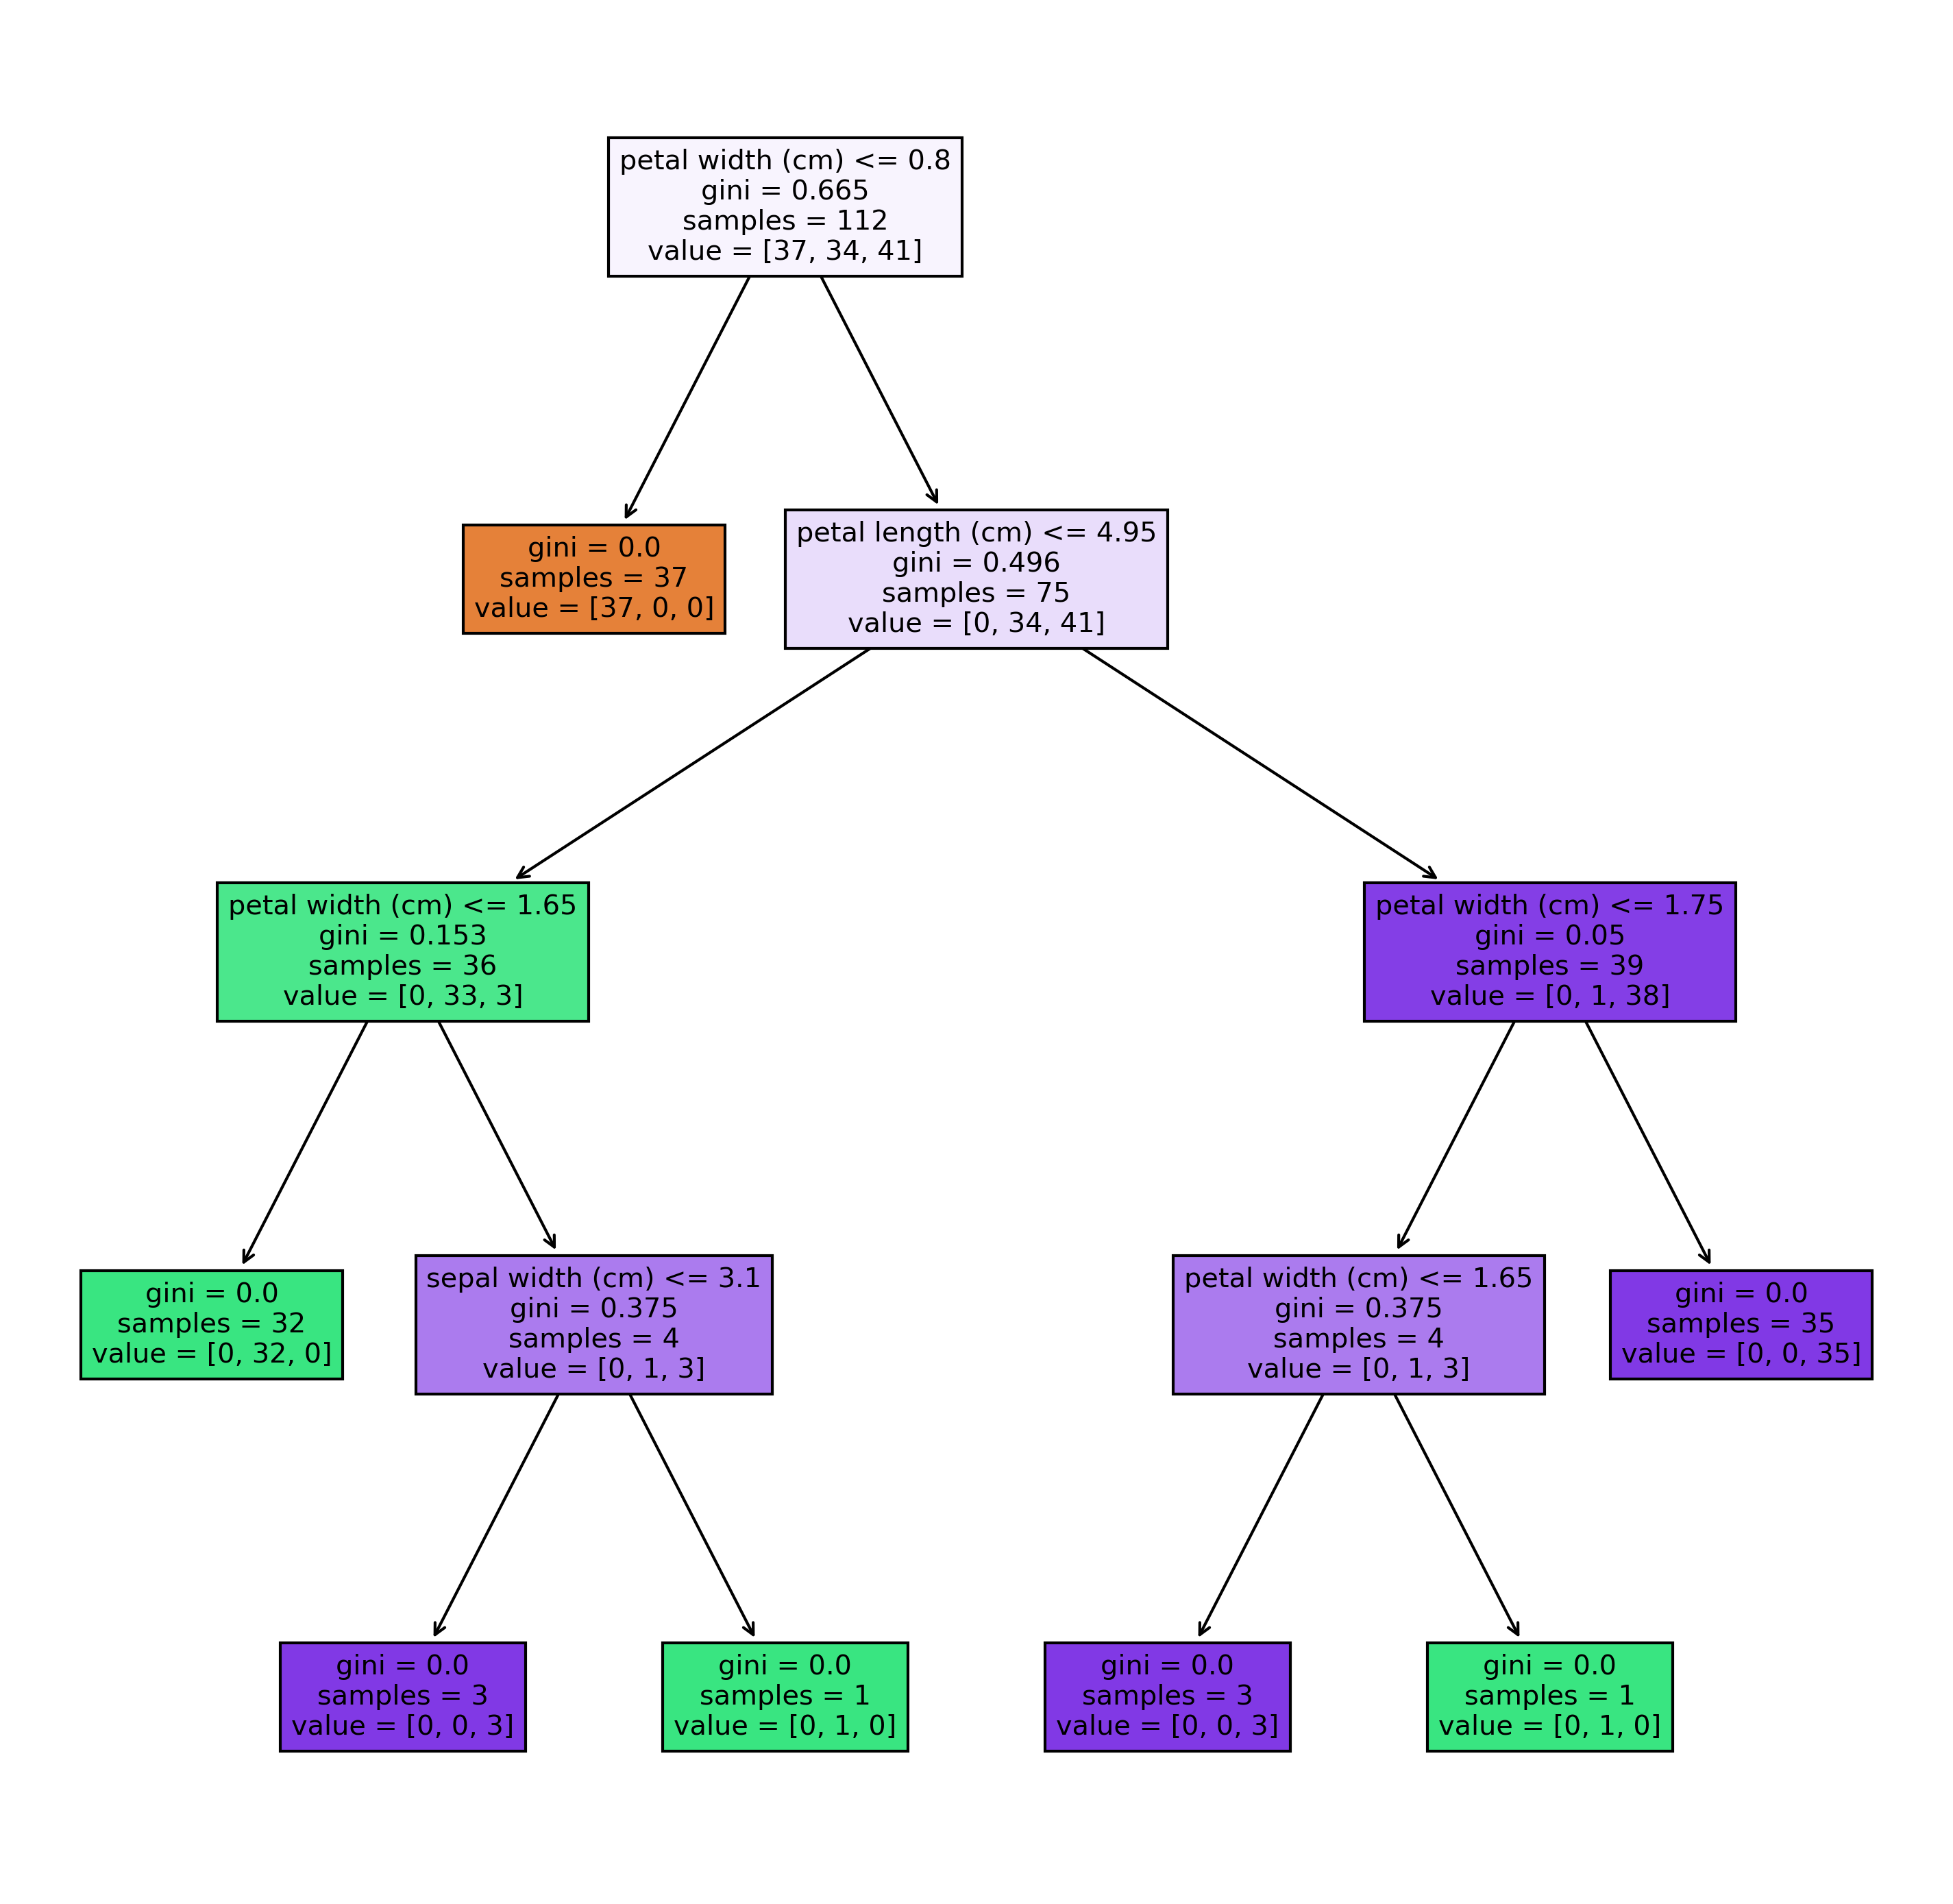

In [76]:
fig = plt.figure(figsize=(12,12), dpi=300)
ax= fig.add_subplot(111)
plot_tree(DT_fit, filled=True, feature_names = data.feature_names)
plt.show() # if you dont use this, the output will have the text above the picture 
# you can save the figure using: fig.savefig('imagename.png')

## Now, we know how to train and vizualize a tree! 

But lets look at what the important features are, use our trained ml to predict a flower type using our testing data we made. 

### First the importance of each feature (column): 

In [78]:
import numpy as np
importances = pd.DataFrame({'feature':train_data.columns,'importance':np.round(DT_fit.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [79]:
importances

,feature,importance
3,petal width (cm),0.581
2,petal length (cm),0.399
1,sepal width (cm),0.020
0,sepal length (cm),0.000


The higher the value of importance, the more "relative importance" the feature has in categorizing the data. This value is somewhere between 0 and 1. 

The most important feature, i.e. the feature that has the lowest initial gini index using the entire data set, is the petal width. The petal length is then the second most important feature and the sepal width is used only slightly. 

### Now lets look at predicting classes! 

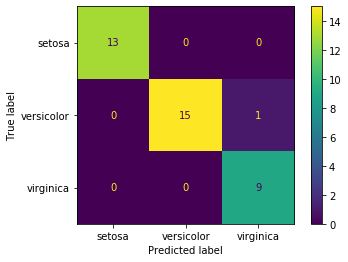

In [91]:
from sklearn.metrics import plot_confusion_matrix 

plot_confusion_matrix(DT_fit, test_data, test_target, display_labels = data.target_names)

This confusion matrix tells us the number of correctly and incorrectly labelled samples occur for our test set that we created. 

Our simple decision tree works quite well with our test set becasue only one sample has been misclassified, a versicolor was mistakenly classified as a virginica. With such a small and simple example this is not unsurprising, but as the number of siamples and features (columns) increase there is a risk of over fitting the training data. 

### Now it's your turn! 

Try running through this entire process again but changing a few key aspects to see what effect it has on the decision tree! 
1. Keep everything the same but change the way that impurity is calculated from the Gini Index to Entropy. This can be done by passing criterion='entropy' as the first arguement when you create the decision tree classifier instance 
    * i.e.: DT_class = DecisionTreeClassifier(criterion='entropy', random_state = 0)
2. Change the train_test_split to have: 
    * a different random state 
        - i.e.: train_test_split(flower_df[data.feature_names], flower_df['target'], random_state=??)
    * a different fraction/percentage of testing and training data with train_size somewhere between 0.0 and 1.0
        - i.e.: train_test_split(flower_df[data.feature_names], flower_df['target'], random_state=0, train_size = 0.3)


How do your new models compare to the first one we made? 

Do they predict better or worse and why?
